## Overview

This script visualizes key statistics and distributions of a mosquito wing image dataset used for classification. It produces:

1. A bar plot showing the number of images per species and the proportional contribution of imaging devices per species (Figure 1).
2. A diagram explaining the 6-fold dataset split used in a 5-fold cross-validation setup, including validation and training partitioning (Figure 2).

## Input

* A pickled pandas DataFrame: `utils/references/database_reference_MLREADY.pkl`
  This DataFrame must include the following columns:

  * `LABEL`: species label
  * `Device`: imaging device used
  * `Specimen ID`: unique specimen identifier
  * `Wing side`: either `'L'` or `'R'` (left or right wing)

## Output

* Two figures saved to the `figures` directory:

  * `Figure_1.tif`: Species distribution and device usage per species
  * `Figure_2.tif`: Visualization of dataset split and cross-validation strategy

## Notes

* The script performs data cleaning to ensure consistent naming of devices.
* Assumes the project root directory is defined as `ROOT` in `utils/config.py`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
# Set the working directory
os.chdir("..")
from utils.config import ROOT
os.chdir(ROOT)

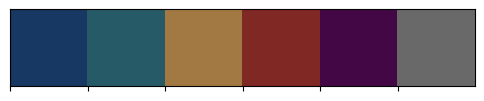

In [3]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Define colorscheme 
bnitm_colors  = ["#173863", "#265A67", "#A27942", "#802823", "#430745", "#696969"]
sb.palplot(bnitm_colors)

In [4]:
# Load DataFrame
df = pd.read_pickle(os.path.join("utils", "references", "database_reference_MLREADY.pkl"))

# Sort by LABEL count
value_counts = df['LABEL'].value_counts()
df = df.set_index('LABEL').loc[value_counts.index].reset_index()

# Clean up some minor spelling mistakes
df["Device"] = df["Device"].str.replace("olympus sz61 + olympus dp23", "Olympus SZ61 + Olympus DP23")
df["Device"] = df["Device"].str.replace("macrolens + iphone se", "Macrolens + iPhone SE")
df["Device"] = df["Device"].str.replace('leica-m205c', 'Leica-M205C')
df["Device"] = df["Device"].str.replace('leica m205c + leica k/3c', 'Leica-M205C')

In [5]:
# Latex List fro Figure 1
species_list_latex_sorted = [
    '$\\it{Cx. torrentium-pipiens\\ }$s.l. pair',
    '$\\it{Ae. aegypti}$',
    '$\\it{Ae. albopictus}$',
    '$\\it{Ae. japonicus}$',
    '$\\it{Ae. koreicus}$',
    "other",
    '$\\it{An. maculipennis}$ s.l.',
    '$\\it{Cx. vishnui}$-group',
    '$\\it{Ae. communis-punctor\\ }$pair',
    '$\\it{Ae. vexans}$',
    '$\\it{Ae. cinereus-geminus\\ }$pair',
    '$\\it{Ae. annulipes}$-group',
    '$\\it{An. stephensi}$',
    '$\\it{Ae. sticticus}$',
    '$\\it{Ae. rusticus}$',
    '$\\it{Cs. morsitans-fumipennis\\ }$pair',
    '$\\it{Cx. modestus}$',
    '$\\it{Ae. cataphylla}$',
    '$\\it{An. claviger - petragnani\\ }$pair',
    '$\\it{Cq. richiardii}$',
    '$\\it{Ae. caspius}$',
    ]

In [6]:
# Get the distribution of devices
df["Device"].value_counts(normalize=True)

Device
Olympus SZ61 + Olympus DP23    0.635008
Leica-M205C                    0.256717
Macrolens + iPhone SE          0.108275
Name: proportion, dtype: float64

In [7]:
# Get the number of unique specimens
df["Specimen ID"].nunique()

8947

In [7]:
# Find the percentage of mosquito samples which have both wings in the dataset (L and R)
both_wings_count = df.groupby('Specimen ID')['Wing side'].nunique().eq(2).sum()
total_specimens = df['Specimen ID'].nunique()
percentage_both_wings = (both_wings_count / total_specimens) * 100
percentage_both_wings

48.16139488096569

In [8]:
# Find the percentage of mosquito samples which have been captured with multiple devices
both_device_count = df.groupby(['Specimen ID', "Wing side"])['Device'].nunique().eq(2).sum()
total_specimens = 13256
percentage_both_wings = (both_device_count / total_specimens) * 100
percentage_both_wings

11.217561858780929

/var/folders/zq/vkd6f9tx4gdctwbs4b3j895w0000gn/T/ipykernel_47586/1844896154.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  b = sb.histplot(df, x="LABEL", hue="Device", edgecolor="white" , palette= bnitm_colors[1:], multiple="fill", ax=ax[1], alpha=.8)
/var/folders/zq/vkd6f9tx4gdctwbs4b3j895w0000gn/T/ipykernel_47586/1844896154.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(species_list_latex_sorted, fontsize=12)


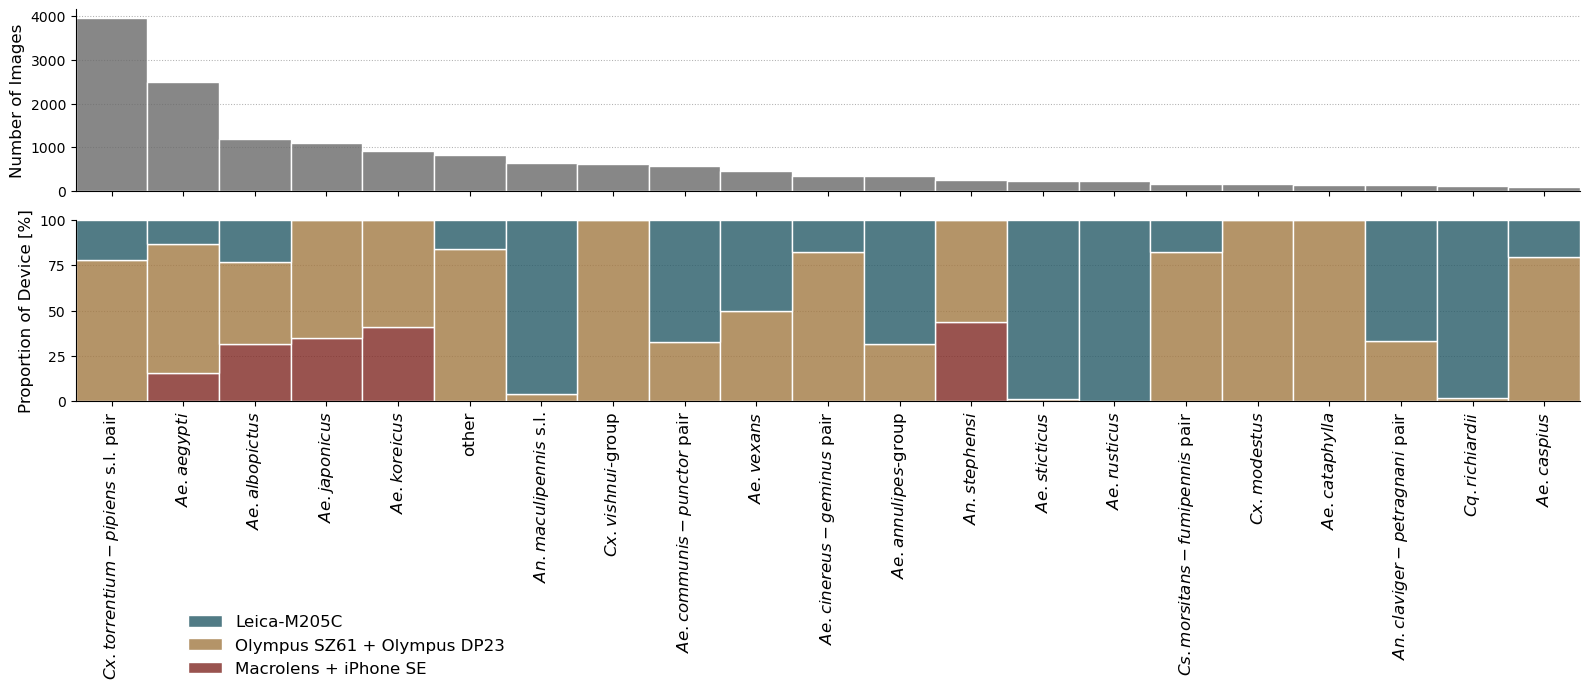

In [9]:
# Figure 1
fig, ax = plt.subplots(2,1, figsize=(16,7), sharex=True)

a = sb.histplot(df, x="LABEL", color=bnitm_colors[-1], edgecolor="white", alpha=.8, ax=ax[0], fill=True)
b = sb.histplot(df, x="LABEL", hue="Device", edgecolor="white" , palette= bnitm_colors[1:], multiple="fill", ax=ax[1], alpha=.8)

ax[0].yaxis.grid(True, which='major', linestyle='dotted', linewidth=.75)
ax[0].set_axisbelow(True)
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set_ylabel("Number of Images", fontsize=12)

ax[1].yaxis.grid(True, which='major', linestyle='dotted', linewidth=.75)
ax[1].set_axisbelow(True)
ax[1].set_xlabel("")
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_xticklabels(species_list_latex_sorted, fontsize=12)
ax[1].set_ylabel("Proportion of Device [%]", fontsize=12)
ax[1].set_yticks([0, .25, .5, .75, 1])
ax[1].set_yticklabels(["0", "25", "50", "75", "100"])
ax[1].spines[['right', 'top']].set_visible(False)
plt.tight_layout()
sb.move_legend(b, "lower center", bbox_to_anchor=(.18, -1.6), title="", ncol=1,  frameon=False, fontsize=12)
plt.savefig(os.path.join("figures", "Figure_1.tif"), dpi=300)

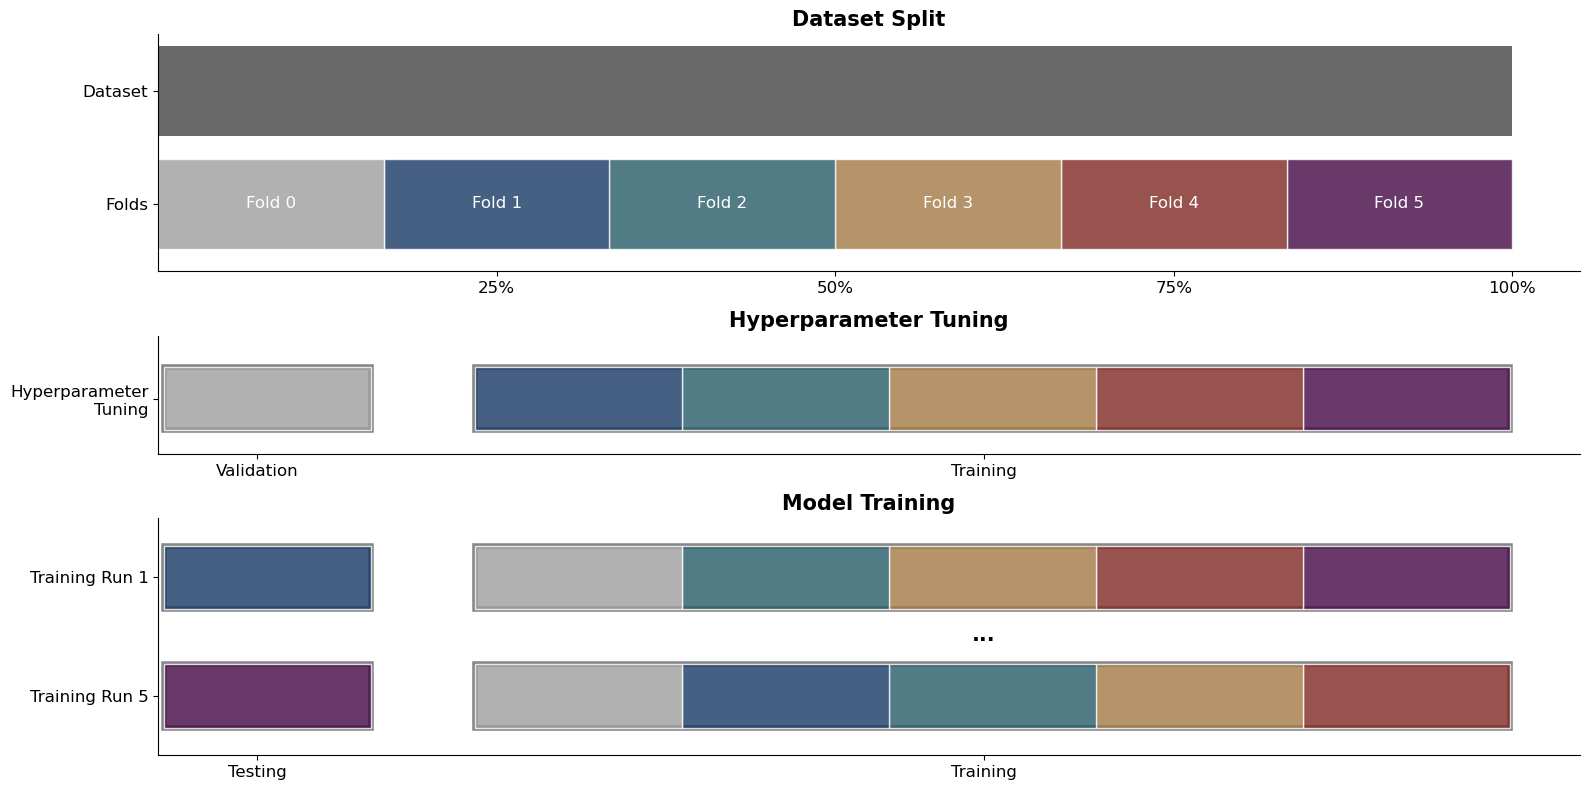

In [10]:
# I want visualize the a dataset which is split into six folds with a 5-fold cross-validation
bnitm_colors = ["#173863", "#265A67", "#A27942", "#802823", "#430745", "#696969"]
prop = 1/6
fig, ax = plt.subplots(3, figsize=(16,8), gridspec_kw={'height_ratios': [2, 1, 2]})
ax[0].barh(0,1, label="Complete Dataset", color=bnitm_colors[5])
ax[0].barh(-1,prop, left=prop*5,label="Fold 5", color=bnitm_colors[4], edgecolor="white", alpha=.8)
ax[0].barh(-1,prop, left=prop*4,label="Fold 4", color=bnitm_colors[3], edgecolor="white", alpha=.8)
ax[0].barh(-1,prop, left=prop*3,label="Fold 3", color=bnitm_colors[2], edgecolor="white", alpha=.8)
ax[0].barh(-1,prop, left=prop*2,label="Fold 2", color=bnitm_colors[1], edgecolor="white", alpha=.8)
ax[0].barh(-1,prop, left=prop*1,label="Fold 1", color=bnitm_colors[0], edgecolor="white", alpha=.8)
ax[0].barh(-1,prop, left=0, label="Fold 0 (Validation)", color="#9E9E9E", edgecolor="white", alpha=.8)

# Add labels on bars
for i, label in enumerate(["Fold 0", "Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]):
    ax[0].text(prop*i + prop/2, -1, label, ha='center', va='center', color='white', fontsize=12)

ax[0].set_yticks([0, -1])
ax[0].set_yticklabels(["Dataset", "Folds"], fontsize=12)
ax[0].set_ylim(-1.6,.5)

ax[0].set_xticks([0.25,0.5,0.75,1])
ax[0].set_xticklabels(["25%", "50%", "75%", "100%"], fontsize=12)
#turn all spines but the left one of
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[0].set_title("Dataset Split", fontsize=15,  fontweight='bold')

#ax[0].legend(title="Fold", loc="center", bbox_to_anchor=(.5, .5), frameon=False)
#Validation Fold
ax[1].barh(0,prop*5, left=prop*1.5, color="white", edgecolor="dimgrey", alpha=.8, linewidth=4)
ax[1].barh(0,prop, left=0, color="white", edgecolor="dimgrey", alpha=.8, linewidth=4)

ax[1].barh(0,prop, left=prop*5.5,label="Fold 5", color=bnitm_colors[4], edgecolor="white", alpha=.8)
ax[1].barh(0,prop, left=prop*4.5,label="Fold 4", color=bnitm_colors[3], edgecolor="white", alpha=.8)
ax[1].barh(0,prop, left=prop*3.5,label="Fold 3", color=bnitm_colors[2], edgecolor="white", alpha=.8)
ax[1].barh(0,prop, left=prop*2.5,label="Fold 2", color=bnitm_colors[1], edgecolor="white", alpha=.8)
ax[1].barh(0,prop, left=prop*1.5,label="Fold 1", color=bnitm_colors[0], edgecolor="white", alpha=.8)
ax[1].barh(0,prop, left=0, label="Fold 0 (Validation)", color="#9E9E9E", edgecolor="white", alpha=.8)

ax[1].set_xticks([0.075, 0.66])
ax[1].set_xticklabels(["Validation", "Training"], fontsize=12)
ax[1].set_xlim(-0.005,1.14)

ax[1].set_yticks([0])
ax[1].set_yticklabels(["Hyperparameter\nTuning"], fontsize=12)
ax[1].set_ylim(-.7,.8)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_title("Hyperparameter Tuning", fontsize=15, fontweight='bold')

#ax[2]
# First Fold
ax[2].barh(-1,prop*5, left=prop*1.5, color="white", edgecolor="dimgrey", alpha=.8, linewidth=4)
ax[2].barh(-1,prop, left=0, color="white", edgecolor="dimgrey", alpha=.8, linewidth=4)

ax[2].barh(-1,prop, height=.8, left=prop*5.5,label="Fold 5", color=bnitm_colors[4], edgecolor="white", alpha=.8)
ax[2].barh(-1,prop, left=prop*4.5,label="Fold 4", color=bnitm_colors[3], edgecolor="white", alpha=.8)
ax[2].barh(-1,prop, left=prop*3.5,label="Fold 3", color=bnitm_colors[2], edgecolor="white", alpha=.8)
ax[2].barh(-1,prop, left=prop*2.5,label="Fold 2", color=bnitm_colors[1], edgecolor="white", alpha=.8)
ax[2].barh(-1,prop, left=prop*1.5,label="Fold 0", color="#9E9E9E", edgecolor="white", alpha=.8)
ax[2].barh(-1,prop, left=0, label="Fold 1", color=bnitm_colors[0], edgecolor="white", alpha=.8)

# Last Fold
ax[2].barh(-2.5,prop*5, left=prop*1.5, color="white", edgecolor="dimgrey", alpha=.8, linewidth=4)
ax[2].barh(-2.5,prop, left=0, color="white", edgecolor="dimgrey", alpha=.8, linewidth=4)

ax[2].barh(-2.5,prop, left=prop*5.5,label="Fold 4", color=bnitm_colors[3], edgecolor="white", alpha=.8)
ax[2].barh(-2.5,prop, left=prop*4.5,label="Fold 3", color=bnitm_colors[2], edgecolor="white", alpha=.8)
ax[2].barh(-2.5,prop, left=prop*3.5,label="Fold 2", color=bnitm_colors[1], edgecolor="white", alpha=.8)
ax[2].barh(-2.5,prop, left=prop*2.5,label="Fold 1", color=bnitm_colors[0], edgecolor="white", alpha=.8)
ax[2].barh(-2.5,prop, left=prop*1.5,label="Fold 0", color="#9E9E9E", edgecolor="white", alpha=.8)
ax[2].barh(-2.5,prop, left=0, label="Fold 5", color=bnitm_colors[4], edgecolor="white", alpha=.8)


ax[2].set_xticks([0.075, 0.66])
ax[2].set_xticklabels(["Testing", "Training"], fontsize=12)
ax[2].set_xlim(-0.005,1.14)

ax[2].set_yticks([-1, -2.5])
ax[2].set_yticklabels(["Training Run 1", "Training Run 5"], fontsize=12)
ax[2].set_ylim(-3.25, -.25)

ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

# annotate a "..." between the training runs
ax[2].text(.66, -1.73, "...", ha='center', va='center', color='black', fontsize=15, fontweight='bold')
ax[2].set_title("Model Training", fontsize=15, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join("figures", "Figure_2.tif"), dpi=300)